In [1]:
import numpy as np
import cv2 as cv
from lic import *
import os

In [2]:
test_img = '../images/raw/Angela_Lansbury_0002.jpg'

In [3]:
img = cv.imread(test_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [4]:
labels, label_counts = label_regions(img_lab, img_lab.shape[0] * img_lab.shape[1] // 8)
vec = extract_region_vector_field(img_gray, labels, label_counts)
im_noise = generate_noise_image(img_gray, labels, label_counts)

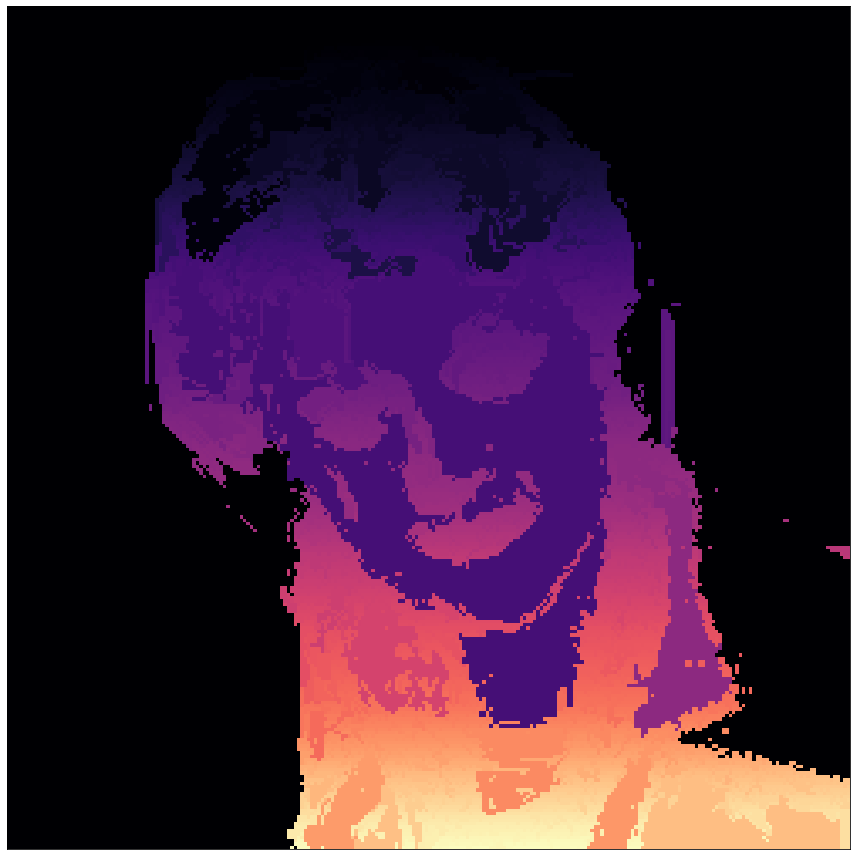

In [32]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('magma')
plt.imshow(labels)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('../LIC_labels.png')

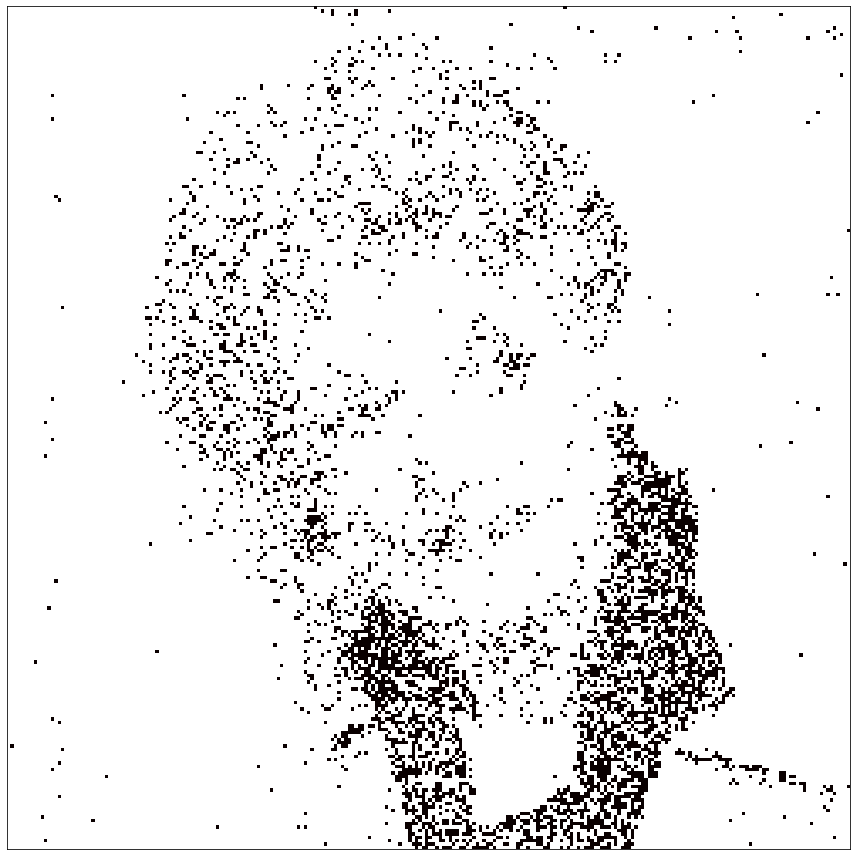

In [33]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('hot')
plt.imshow(im_noise)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('../LIC_noise.png')

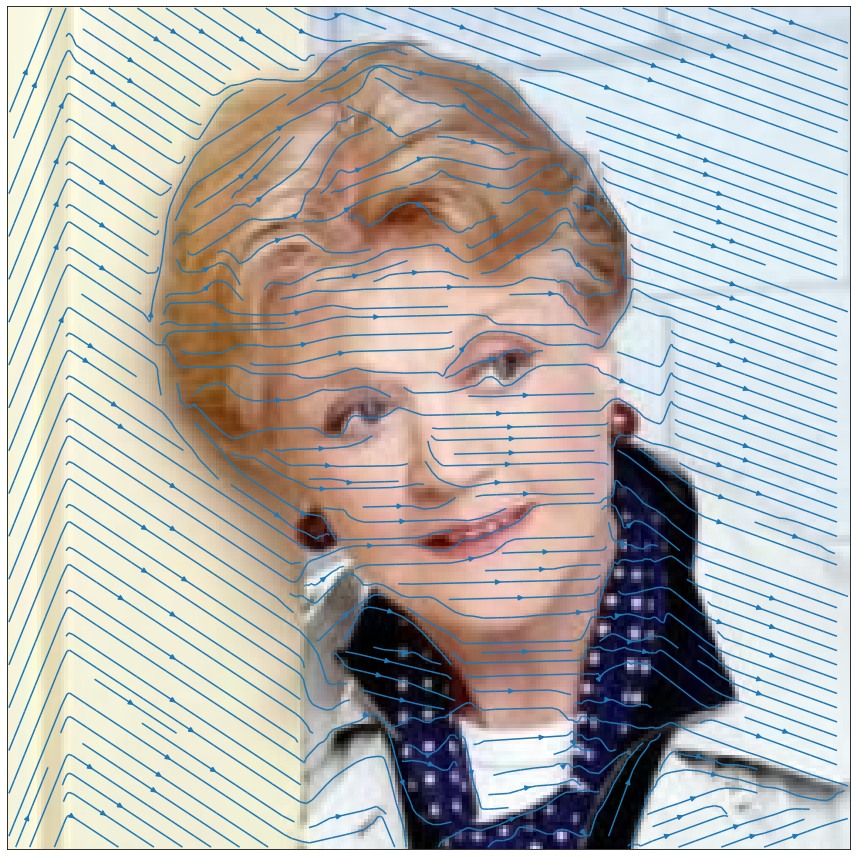

In [34]:
figure = plt.figure(figsize=(12,12))
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
#plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
plt.streamplot(X, Y, vec[:, :, 1], vec[:, :, 0], density=(2, 2))
plt.tight_layout()
plt.savefig('../LIC_streams.png')

In [23]:
lic = line_integral_convolution(im_noise, vec, KW=12, use_tqdm=True)

100%|██████████| 62500/62500 [01:14<00:00, 836.04it/s] 

int_time 55.185649156570435
int2_time 0.0011203289031982422
conv_time 15.45518970489502
acc_time 3.339364528656006


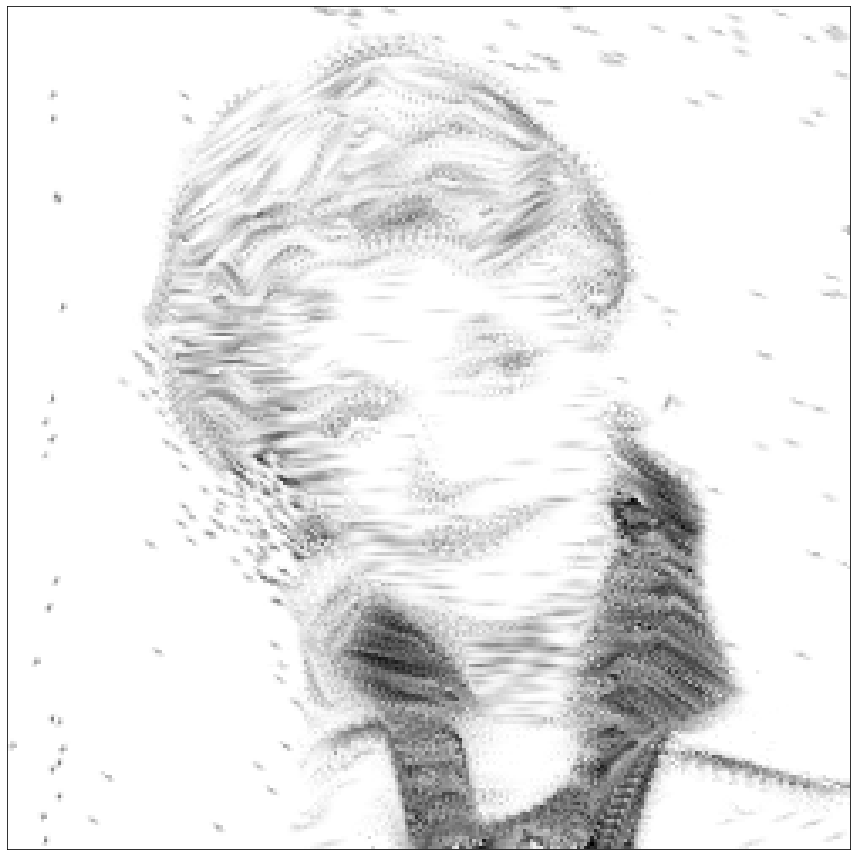

In [35]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('gray')
plt.imshow(lic)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('../LIC_lic.png')

In [23]:
KWs = [3, 4, 5, 6, 7]
im_sketchs = [line_integral_convolution(im_noise, vec, KW=KW, use_tqdm=True) for KW in KWs]

100%|██████████| 62500/62500 [03:28<00:00, 299.73it/s]


In [24]:
rawdir, filename = os.path.split(test_img)
base, ext = os.path.splitext(filename)
imagesdir, _ = os.path.split(rawdir)
outdir = os.path.join(imagesdir, 'kw_exp')

if not os.path.exists(outdir):
    os.makedirs(outdir)

for KW, im_sketch in zip(KWs, im_sketchs):
    cv.imwrite(os.path.join(outdir, '{}_KW_{}{}'.format(base, KW, ext)), im_sketch)